## Example from my slides
This agent is following the following pattern:
- System/Developer: "You are a stock bot. . ."
- User: "Check Item 50."
- Assistant (Tool Call): "I'll call get_inventory for ID 50."
- Tool (Result): "5 units available."
- Assistant (Final): "Item 50 is in stock (5 units)."

In [ ]:
from langchain_core._api import as_import_path
from pydantic import BaseModel, Field
from langchain_openai import ChatOpenAI
from langchain.agents import create_agent
from langchain_core.tools import tool

from dotenv import load_dotenv   # from the python-dotenv library - load the OpenAI API key from file
load_dotenv(import_path="../.env") # This will load the OpenAI API key from the .env file


True

In [31]:
# --- STEP 1: Modern Tool Definition ---
@tool
def get_inventory(item_id: str):
    """Check stock levels for a specific item ID."""
    return f"Item {item_id} has 5 units in stock."

In [32]:
# --- STEP 2: Structured Output Schema (The final JSON) ---
class FinalResponse(BaseModel):
    """The structured response for the end user."""
    answer: str = Field(description="The main answer to the user")
    in_stock: bool = Field(description="Whether the item is available")

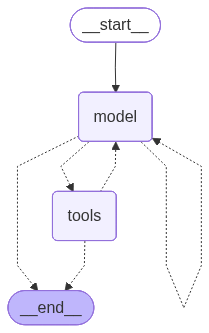

In [33]:
# --- STEP 3: Setup the Agent ---
# The new 'create_agent' automatically handles the tool-calling loop
agent = create_agent(
    model="openai:gpt-4o",
    tools=[get_inventory],
    # This automatically handles the "Step 4" JSON structure
    response_format=FinalResponse,
    system_prompt="You are a stock assistant. Check inventory before answering."
)
agent

In [34]:
# --- STEP 4: Execution ---
result = agent.invoke({
    "messages": [{"role": "user", "content": "Check stock for Item 50"}]
})

In [35]:
# Accessing the structured data
import json
print(result.__class__)
print(result["structured_response"].answer)

for msg in result['messages']:
    print(msg)

<class 'dict'>
Item 50 is in stock with 5 units available.
content='Check stock for Item 50' additional_kwargs={} response_metadata={} id='81c70338-1f44-4622-8045-7e35aecab2d1'
content='' additional_kwargs={'parsed': None, 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 130, 'total_tokens': 145, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_ad98c18a04', 'id': 'chatcmpl-D6g3qUZzRZqFhCei4QesZL1bIgi4C', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='lc_run--019c3912-351c-7f51-8423-2fc867e027f8-0' tool_calls=[{'name': 'get_inventory', 'args': {'item_id': '50'}, 'id': 'call_snvCYruCtFZ8Phtc74ch0Dn5', 'type': 'tool_call'}] invalid_tool_calls=[] usage_metadata={'input_to